## Bibliotecas

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

## Importar Datos

In [4]:
features = ['PALO1', 'NUM1', 'PALO2', 'NUM2', 'PALO3', 'NUM3', 'PALO4', 'NUM4', 'PALO5', 'NUM5', 'HAND']
TRAIN=pd.read_csv('poker-hand-testing.data', names=features)
TEST=pd.read_csv('poker-hand-training-true.data', names=features)

In [5]:
TRAIN.head(5)


,PALO1,NUM1,PALO2,NUM2,PALO3,NUM3,PALO4,NUM4,PALO5,NUM5,HAND
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


## EDA

In [6]:
print(len(TRAIN.index))
print(len(TRAIN.columns))
print(len(TEST.index))
print(len(TEST.columns))

1000000
11
25010
11


In [7]:
print(TRAIN.info())
print(TEST.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   PALO1   1000000 non-null  int64
 1   NUM1    1000000 non-null  int64
 2   PALO2   1000000 non-null  int64
 3   NUM2    1000000 non-null  int64
 4   PALO3   1000000 non-null  int64
 5   NUM3    1000000 non-null  int64
 6   PALO4   1000000 non-null  int64
 7   NUM4    1000000 non-null  int64
 8   PALO5   1000000 non-null  int64
 9   NUM5    1000000 non-null  int64
 10  HAND    1000000 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PALO1   25010 non-null  int64
 1   NUM1    25010 non-null  int64
 2   PALO2   25010 non-null  int64
 3   NUM2    25010 non-null  int64
 4   PALO3   25010 non-null  int64
 5   NUM

In [8]:
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nada',
    1: 'Pareja',
    2: 'Doble pareja',
    3: 'Trío',
    4: 'Escalera',
    5: 'Color',
    6: 'Full',
    7: 'Poker',
    8: 'Escalera Color',
    9: 'Escalera Real',
}

## Jugadas en TRAIN

In [9]:
manos = 10  
num_jugadas = {}
for mano in range(manos):
    num_jugadas[mano] = len(TRAIN[TRAIN.HAND==mano])
print(num_jugadas)

{0: 501209, 1: 422498, 2: 47622, 3: 21121, 4: 3885, 5: 1996, 6: 1424, 7: 230, 8: 12, 9: 3}


In [10]:
for hand in poker_hands:
    print("%s: %d" % (hand_name[hand], num_jugadas[hand]))

Nada: 501209
Pareja: 422498
Doble pareja: 47622
Trío: 21121
Escalera: 3885
Color: 1996
Full: 1424
Poker: 230
Escalera Color: 12
Escalera Real: 3


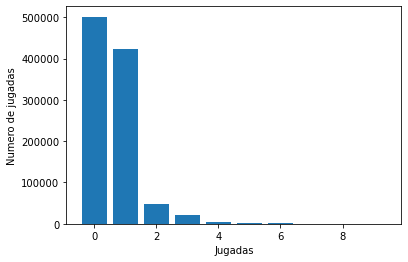

In [12]:
plt.bar(poker_hands, [num_jugadas[hand] for hand in poker_hands], align='center')
plt.xlabel('Jugadas')
plt.ylabel('Numero de jugadas');

## Jugadas en TEST

In [14]:
manos = 10  
num_jugadas = {}
for mano in range(manos):
    num_jugadas[mano] = len(TEST[TEST.HAND==mano])
print(num_jugadas)

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [15]:
for hand in poker_hands:
    print("%s: %d" % (hand_name[hand], num_jugadas[hand]))

Nada: 12493
Pareja: 10599
Doble pareja: 1206
Trío: 513
Escalera: 93
Color: 54
Full: 36
Poker: 6
Escalera Color: 5
Escalera Real: 5


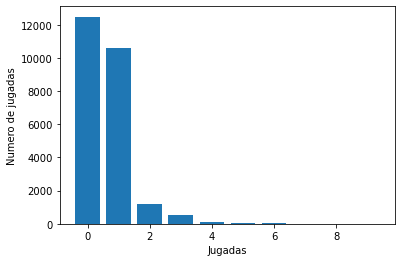

In [16]:
plt.bar(poker_hands, [num_jugadas[hand] for hand in poker_hands], align='center')
plt.xlabel('Jugadas')
plt.ylabel('Numero de jugadas');